In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

%matplotlib inline
start = time. time()

In [61]:
btc_data = pd.read_csv("BTC-USD.csv",index_col="Date",parse_dates=True)
btc_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-03-06,658.299988,661.830017,636.219971,648.260010,648.260010,1367401
2014-03-07,648.260010,655.200012,600.309998,616.729980,616.729980,1498290
2014-03-08,616.729980,625.679993,588.580017,609.210022,609.210022,1335982
2014-03-09,609.210022,637.599976,598.510010,627.049988,627.049988,1209993
2014-03-10,627.049988,633.679993,594.700012,612.969971,612.969971,1648979


In [62]:
btc_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1827 entries, 2014-03-06 to 2019-03-06
Data columns (total 6 columns):
Open         1827 non-null float64
High         1827 non-null float64
Low          1827 non-null float64
Close        1827 non-null float64
Adj Close    1827 non-null float64
Volume       1827 non-null int64
dtypes: float64(5), int64(1)
memory usage: 99.9 KB


In [63]:
btc_data["Average"] = (btc_data["High"] + btc_data["Low"])/2
btc_data.head()

,Open,High,Low,Close,Adj Close,Volume,Average
Date,,,,,,,
2014-03-06,658.299988,661.830017,636.219971,648.260010,648.260010,1367401,649.024994
2014-03-07,648.260010,655.200012,600.309998,616.729980,616.729980,1498290,627.755005
2014-03-08,616.729980,625.679993,588.580017,609.210022,609.210022,1335982,607.130005
2014-03-09,609.210022,637.599976,598.510010,627.049988,627.049988,1209993,618.054993
2014-03-10,627.049988,633.679993,594.700012,612.969971,612.969971,1648979,614.190002


Text(0, 0.5, 'Volume (BTC)')

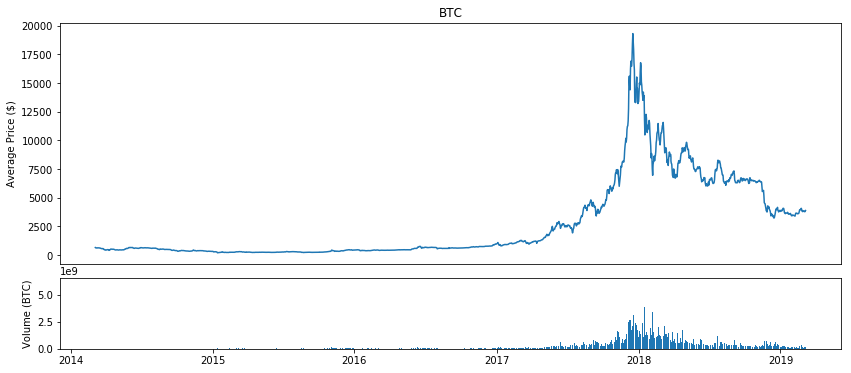

In [152]:
input_features = btc_data.iloc[:,[5,6]].values

plt.figure(figsize=(14,6))
top = plt.subplot2grid((4,4), (0, 0), rowspan=3, colspan=4)
bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
top.plot(btc_data.index, input_features[:,1]) 
bottom.bar(btc_data.index, input_features[:,0]) 
 
# set the labels
top.axes.get_xaxis().set_visible(False)
top.set_title('BTC')
top.set_ylabel('Average Price ($)')
bottom.set_ylabel('Volume (BTC)')


In [58]:
from sklearn.preprocessing import MinMaxScaler

sc= MinMaxScaler(feature_range=(0,1))
input_data = sc.fit_transform(input_features[:,:])



(-0.010152123643685966, 5.231031199596498e-05)

In [53]:
lookback= 50
test_size=365
X_tmp=[]
y=[]

for i in range(lookback, len(btc_data)):
    X_tmp.append(input_data[i-lookback:i, :])
    
y = input_data[lookback:-test_size,1]

X_tmp, y = np.array(X_tmp), np.array(y)
X = X_tmp[:-test_size,:]
X_test = X_tmp[-test_size:]

X = X.reshape(X.shape[0],lookback, 2)
X_test = X_test.reshape(X_test.shape[0],lookback, 2)
print(X.shape, y.shape)
print(X_test.shape)


(1412, 50, 2) (1412,)
(365, 50, 2)


In [8]:
from keras import Sequential
from keras.layers import Dense, LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [9]:
model = Sequential()
model.add(LSTM(units=30, return_sequences= True, input_shape=(X.shape[1],2)))
#model.add(Dropout(0.2))

model.add(LSTM(units=30, return_sequences=True))
#model.add(Dropout(0.2))

model.add(LSTM(units=30))
#model.add(Dropout(0.2))

model.add(Dense(units=1))
#model.add(Dropout(0.2))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50, 30)            3960      
_________________________________________________________________
lstm_2 (LSTM)                (None, 50, 30)            7320      
_________________________________________________________________
lstm_3 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 18,631
Trainable params: 18,631
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [11]:
model.fit(X, y, epochs=100, batch_size=32)

Epoch 1/100
1412/1412 [==============================] - 5s 4ms/step - loss: 0.0072
Epoch 2/100
1412/1412 [==============================] - 3s 2ms/step - loss: 0.0014
Epoch 3/100
1412/1412 [==============================] - 3s 2ms/step - loss: 0.0013
Epoch 4/100
1412/1412 [==============================] - 3s 2ms/step - loss: 0.0011
Epoch 5/100
1412/1412 [==============================] - 4s 3ms/step - loss: 8.4627e-04
Epoch 6/100
1412/1412 [==============================] - 4s 3ms/step - loss: 8.0323e-04
Epoch 7/100
1412/1412 [==============================] - 4s 3ms/step - loss: 6.4020e-04
Epoch 8/100
1412/1412 [==============================] - 4s 3ms/step - loss: 6.0274e-04
Epoch 9/100
1412/1412 [==============================] - 5s 3ms/step - loss: 6.3959e-04
Epoch 10/100
1412/1412 [==============================] - 5s 3ms/step - loss: 6.4055e-04
Epoch 11/100
1412/1412 [==============================] - 4s 3ms/step - loss: 8.1849e-04
Epoch 12/100
1412/1412 [======================

In [136]:
predicted_values = model.predict(X_test)

(1827,)


ValueError: x and y must have same first dimension, but have shapes (365,) and (1827,)

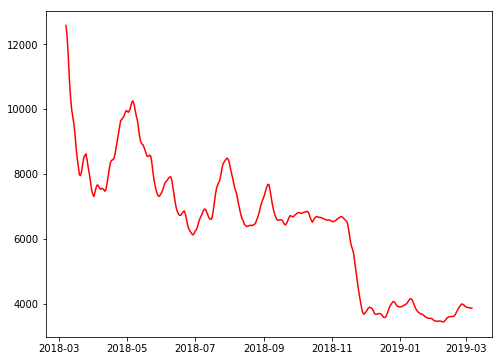

In [154]:
#true_price = btc_data.iloc[-test_size:,6].values
true_price = btc_data[.Average].values
print(true_price.shape)

true_price = np.reshape(true_price, (test_size,1))
plot_dates = btc_data.index.values
plot_dates = plot_dates[-test_size:]

sc_price = MinMaxScaler()
sc_price.min_, sc_price.scale_ = sc.min_[1], sc.scale_[1]
predicted_price = sc_price.inverse_transform(predicted_values)


fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(plot_dates, predicted_price, color = 'red', label = 'Predicted')
plt.plot(plot_dates, true_price, color = 'green', label = 'true')
plt.title("BTC Average price")
plt.ylabel("Average Price ($)")
plt.legend()

error = np.mean(np.abs(predicted_price - true_price) / true_price)
print(error*100)


In [124]:

difference = np.array(predicted[180:])-np.array(true[180:])
true.shape



#plt.plot(difference, color = 'red', label = 'Predicted')

(365, 1)